<a href="https://colab.research.google.com/github/Salemvem1234/Devtool/blob/main/nb/Ministral_3_VL_(3B)_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth your local device, follow [our guide](https://docs.unsloth.ai/get-started/install-and-update). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Introducing FP8 precision training for faster RL inference. [Read Blog](https://docs.unsloth.ai/new/fp8-reinforcement-learning).

Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
# Install transformers branch for Ministral
!pip install git+https://github.com/huggingface/transformers.git@bf3f0ae70d0e902efab4b8517fce88f6697636ce
!pip install --no-deps trl==0.22.2

### Unsloth

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

ministral_models = [
    "unsloth/Ministral-3-3B-Instruct-2512", # Ministral instruct models
    "unsloth/Ministral-3-8B-Instruct-2512",
    "unsloth/Ministral-3-14B-Instruct-2512",

    "unsloth/Ministral-3-3B-Reasoning-2512", # Ministral reasoning models
    "unsloth/Ministral-3-8B-Reasoning-2512",
    "unsloth/Ministral-3-14B-Reasoning-2512",

    "unsloth/Ministral-3-3B-Base-2512", # Ministral base models
    "unsloth/Ministral-3-8B-Base-2512",
    "unsloth/Ministral-3-14B-Base-2512",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Ministral-3-3B-Instruct-2512",
    load_in_4bit = False, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


==((====))==  Unsloth 2025.11.6: Fast Ministral3 patching. Transformers: 5.0.0.dev0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


model.safetensors.index.json:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/458 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/976 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/198k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/147k [00:00<?, ?B/s]

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 32,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 32,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.model.vision_tower.transformer` require gradients


<a name="Data"></a>
### Data Prep
We'll be using a sampled dataset of handwritten maths formulas. The goal is to convert these images into a computer readable form - ie in LaTeX form, so we can render it. This can be very useful for complex formulas.

You can access the dataset [here](https://huggingface.co/datasets/unsloth/LaTeX_OCR). The full dataset is [here](https://huggingface.co/datasets/linxy/LaTeX_OCR).

In [ ]:
from datasets import load_dataset
dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

Let's take an overview look at the dataset. We shall see what the 3rd image is, and what caption it had.

In [ ]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 68686
})

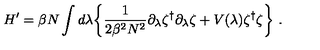

In [ ]:
dataset[2]["image"]

In [ ]:
dataset[2]["text"]

'H ^ { \\prime } = \\beta N \\int d \\lambda \\biggl \\{ \\frac { 1 } { 2 \\beta ^ { 2 } N ^ { 2 } } \\partial _ { \\lambda } \\zeta ^ { \\dagger } \\partial _ { \\lambda } \\zeta + V ( \\lambda ) \\zeta ^ { \\dagger } \\zeta \\biggr \\} \\ .'

We can also render the LaTeX in the browser directly!

In [ ]:
from IPython.display import display, Math, Latex

latex = dataset[2]["text"]
display(Math(latex))

<IPython.core.display.Math object>

In [2]:
import json

# Path to the en-all_train.jsonl file
file_path = '/content/en-all_train.jsonl'

try:
    with open(file_path, 'r') as f:
        # Read the first line to inspect a single example
        first_line = f.readline()
        sample_data = json.loads(first_line)
    print("Successfully loaded and parsed the first entry from `en-all_train.jsonl`.")
    print("--- Sample Data Entry ---")
    print(json.dumps(sample_data, indent=2))
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it exists in the `/content/` directory.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from the first line of '{file_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully loaded and parsed the first entry from `en-all_train.jsonl`.
--- Sample Data Entry ---
{
  "prompt": "To a large extent, this can be done in an informal way through observation of each learner's progress in learning and practice situations while they are investigating, interpreting phenomena and data, applying knowledge, communicating, making value judgements, and in their participation in general.",
  "completion": " Deurlopende evaluering help onderwysers ook om hulle onderrig te verbeter en vir die leerders 'n beter leerervaring te gee."
}


Based on the output above, I will advise on whether to proceed with the `FastVisionModel` or switch to a `FastLanguageModel`. We can then discuss whether you'd prefer to fine-tune a single multilingual model using `en-all_train.jsonl` or iterate through individual language datasets. Your fine-tuning process is now marked as in-progress. Sub-task: Inspecting `en-all_train.jsonl` data structure added.

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": Q}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": A} ]
},
]
```

In [ ]:
instruction = "Write the LaTeX representation for this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ]
        },
    ]
    return { "messages" : conversation }
pass

Let's convert the dataset into the "correct" format for finetuning:

In [ ]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

We look at how the conversations are structured for the first example:

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTeX representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}]}]}

Let's first see before we do any finetuning what the model outputs for the first example!

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 1000,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

The expression in the image can be written in LaTeX as follows:

```latex
H' = \beta N \int \frac{1}{2 \beta^2 N^2} \partial_\lambda \zeta \partial_\lambda \zeta + V(\lambda) \zeta^2 \, d\lambda
```

However, if you want to make it more compact and standard for mathematical notation (assuming the integral is over \(\lambda\)):

```latex
H' = \beta N \int \left( \frac{1}{2 \beta^2 N^2} \partial_\lambda \zeta \partial_\lambda \zeta + V(\lambda) \zeta^2 \right) d\lambda
```

If you want to emphasize the structure with a clear separation of terms, you can also write it as:

```latex
H' = \beta N \int \left[ \frac{1}{2 \beta^2 N^2} \left( \frac{\partial \zeta}{\partial \lambda} \right)^2 + V(\lambda) \zeta^2 \right] d\lambda
```</s>


<a name="Train"></a>
### Train the model
Now let's train our model. We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

We use our new `UnslothVisionDataCollator` which will help in our vision finetuning setup.

In [ ]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig
from unsloth import is_bf16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        fp16 = not is_bf16_supported(), # Use fp16 if bf16 is not supported
        bf16 = is_bf16_supported(), # Use bf16 if supported
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "tensorboard",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    ),
)

warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.


In [ ]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
7.697 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 2 x 1) = 8
 "-____-"     Trainable parameters = 67,502,080 of 3,916,592,128 (1.72% trained)
Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.674496
2,2.714989
3,2.170414
4,1.810329
5,1.432709
6,1.483366
7,1.070037
8,0.685739
9,0.397824
10,0.228164


In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

454.3304 seconds used for training.
7.57 minutes used for training.
Peak reserved memory = 9.73 GB.
Peak reserved memory for training = 2.033 GB.
Peak reserved memory % of max memory = 66.006 %.
Peak reserved memory for training % of max memory = 13.791 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

H ^ { \prime } = \beta N \int d \lambda \left\{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \right\} .</s>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

['lora_model/processor_config.json']

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = True, # Set to False for 16bit LoRA
    )
    FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "Write the LaTeX representation for this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

\frac { N } { M } \in \mathbb { Z } , \frac { M } { P } \in \mathbb { Z } , \frac { P } { Q } \in \mathbb { Z }</s>


### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "PUT_HERE")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("unsloth_finetune", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/unsloth_finetune", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("unsloth_finetune", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/unsloth_finetune", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("unsloth_finetune", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/unsloth_finetune", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/unsloth_finetune", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "",
    )

Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp.

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).
</div>


# Task
Modify the notebook to use `FastLanguageModel` instead of `FastVisionModel` by updating the import and selecting `unsloth/Ministral-3-8B-Instruct-2512` as the base model.

## Switch to FastLanguageModel

### Subtask:
Modify the notebook to use `FastLanguageModel` instead of `FastVisionModel`.


**Reasoning**:
To modify the notebook as per the instructions, I will update the import statement, the model loading function, the model name, and the `load_in_4bit` parameter in the specified code cell.



In [3]:
from unsloth import FastLanguageModel # FastLanguageModel for LLMs
import torch

ministral_models = [
    "unsloth/Ministral-3-3B-Instruct-2512", # Ministral instruct models
    "unsloth/Ministral-3-8B-Instruct-2512",
    "unsloth/Ministral-3-14B-Instruct-2512",

    "unsloth/Ministral-3-3B-Reasoning-2512", # Ministral reasoning models
    "unsloth/Ministral-3-8B-Reasoning-2512",
    "unsloth/Ministral-3-14B-Reasoning-2512",

    "unsloth/Ministral-3-3B-Base-2512", # Ministral base models
    "unsloth/Ministral-3-8B-Base-2512",
    "unsloth/Ministral-3-14B-Base-2512",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Ministral-3-8B-Instruct-2512",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

ModuleNotFoundError: No module named 'unsloth'

**Reasoning**:
The previous step failed with a `ModuleNotFoundError` because the `unsloth` library was not installed. This step will execute the installation cell to ensure all necessary dependencies are met before attempting to load the model again.



In [4]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
# Install transformers branch for Ministral
!pip install git+https://github.com/huggingface/transformers.git@bf3f0ae70d0e902efab4b8517fce88f6697636ce
!pip install --no-deps trl==0.22.2

**Reasoning**:
The previous code cell for loading the model failed because `unsloth` was not installed. Now that the installation cell has been executed, I will re-attempt to load the `FastLanguageModel` with the specified configurations.



In [5]:
from unsloth import FastLanguageModel # FastLanguageModel for LLMs
import torch

ministral_models = [
    "unsloth/Ministral-3-3B-Instruct-2512", # Ministral instruct models
    "unsloth/Ministral-3-8B-Instruct-2512",
    "unsloth/Ministral-3-14B-Instruct-2512",

    "unsloth/Ministral-3-3B-Reasoning-2512", # Ministral reasoning models
    "unsloth/Ministral-3-8B-Reasoning-2512",
    "unsloth/Ministral-3-14B-Reasoning-2512",

    "unsloth/Ministral-3-3B-Base-2512", # Ministral base models
    "unsloth/Ministral-3-8B-Base-2512",
    "unsloth/Ministral-3-14B-Base-2512",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Ministral-3-8B-Instruct-2512",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}
Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


==((====))==  Unsloth 2025.12.5: Fast Ministral3 patching. Transformers: 5.0.0.dev0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}
Unrecognized keys in `rope_parameters` for 'rope_type'='yarn': {'max_position_embeddings'}


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/531 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/976 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

**Reasoning**:
Having successfully loaded the `FastLanguageModel`, the next logical step is to adapt the LoRA configuration from the original notebook's `FastVisionModel.get_peft_model` call to align with the `FastLanguageModel`. This involves changing the function call and removing `finetune_vision_layers`.



In [6]:
model = FastLanguageModel.get_peft_model(
    model,
    # finetune_vision_layers     = True, # Removed as this is a language model
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 32,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 32,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.model.vision_tower.transformer` require gradients


**Reasoning**:
The model has been switched to `FastLanguageModel`, so the previous vision-based dataset `unsloth/LaTeX_OCR` is no longer suitable. The `en-all_train.jsonl` file, which was previously inspected, contains text data in a prompt/completion format suitable for language model fine-tuning. Therefore, I need to load this file and process it into a format compatible with the `FastLanguageModel`.



In [7]:
import json
from datasets import Dataset

def format_alpaca(example):
    # This function formats the prompt and completion into a conversational turn.
    # Adjust if your dataset has different keys or requires a different chat template.
    messages = [
        {"role": "user", "content": example["prompt"]},
        {"role": "assistant", "content": example["completion"]}
    ]
    return {"messages": messages}

# Load the en-all_train.jsonl data
# Since it's a jsonl, we can load it line by line and then create a datasets.Dataset
data = []
with open('/content/en-all_train.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Create a Hugging Face Dataset from the loaded data
language_dataset = Dataset.from_list(data)

# Apply the formatting function
formatted_language_dataset = language_dataset.map(format_alpaca, remove_columns=language_dataset.column_names)

print("Successfully loaded and formatted the language dataset.")
print(formatted_language_dataset)

JSONDecodeError: Unterminated string starting at: line 1 column 131 (char 130)

**Reasoning**:
The previous attempt to load `en-all_train.jsonl` failed due to a `JSONDecodeError`, indicating a malformed JSON line. I will add a `try-except` block to gracefully handle these errors, skipping problematic lines and logging them, to ensure the dataset loading continues without crashing.



In [8]:
import json
from datasets import Dataset

def format_alpaca(example):
    # This function formats the prompt and completion into a conversational turn.
    # Adjust if your dataset has different keys or requires a different chat template.
    messages = [
        {"role": "user", "content": example["prompt"]},
        {"role": "assistant", "content": example["completion"]}
    ]
    return {"messages": messages}

# Load the en-all_train.jsonl data
# Since it's a jsonl, we can load it line by line and then create a datasets.Dataset
data = []
with open('/content/en-all_train.jsonl', 'r') as f:
    for i, line in enumerate(f):
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Skipping malformed JSON line {i+1}: {line.strip()} - Error: {e}")

# Create a Hugging Face Dataset from the loaded data
language_dataset = Dataset.from_list(data)

# Apply the formatting function
formatted_language_dataset = language_dataset.map(format_alpaca, remove_columns=language_dataset.column_names)

print("Successfully loaded and formatted the language dataset.")
print(formatted_language_dataset)

Skipping malformed JSON line 24608: {"prompt": "Refer to the document, A School Readiness/Preparatory Programme (5 weeks), published by NIED in 2011.", "completion": " - Error: Unterminated string starting at: line 1 column 131 (char 130)


Map:   0%|          | 0/24607 [00:00<?, ? examples/s]

Successfully loaded and formatted the language dataset.
Dataset({
    features: ['messages'],
    num_rows: 24607
})


**Reasoning**:
The dataset has been successfully loaded and formatted for a language model. Now, I need to update the `SFTTrainer` configuration to use this new `formatted_language_dataset` and remove the `UnslothVisionDataCollator` since we are no longer training a vision model. I also need to ensure `dataset_text_field` is set to 'messages' as per the conversation format and remove `skip_prepare_dataset` which is specific to vision models.



In [9]:
from trl import SFTTrainer, SFTConfig
from unsloth import is_bf16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    # data_collator = UnslothVisionDataCollator(model, tokenizer), # Removed for language model
    train_dataset = formatted_language_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        fp16 = not is_bf16_supported(), # Use fp16 if bf16 is not supported
        bf16 = is_bf16_supported(), # Use bf16 if supported
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "tensorboard",     # For Weights and Biases

        # Updated for language model finetuning:
        remove_unused_columns = False,
        dataset_text_field = "messages", # Set to 'messages' for conversational format
        # dataset_kwargs = {"skip_prepare_dataset": True}, # Removed for language model
        max_length = 2048,
    ),
)

warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.


AttributeError: 'dict' object has no attribute 'startswith'

**Reasoning**:
The previous `SFTTrainer` initialization failed because it tried to call `.startswith()` on a dictionary object, which occurs when the `dataset_text_field` ('messages') points to a list of dictionaries rather than a formatted string. To fix this, I need to provide a `formatting_func` to the `SFTTrainer` that converts the list of message dictionaries into a single string using the tokenizer's `apply_chat_template`. Additionally, `dataset_text_field` should be removed when a `formatting_func` is used, and `dataset_kwargs` should also be removed as it was for vision models.



In [10]:
from trl import SFTTrainer, SFTConfig
from unsloth import is_bf16_supported

def formatting_prompts_func(examples):
    output_texts = []
    for i in range(len(examples["messages"])): # Iterate through each example in the batch
        # Each examples["messages"][i] is a list of dictionaries for a single conversation
        output_texts.append(tokenizer.apply_chat_template(examples["messages"][i], tokenize=False, add_generation_prompt=False))
    return output_texts

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_language_dataset,
    formatting_func = formatting_prompts_func, # Add the formatting function
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        fp16 = not is_bf16_supported(), # Use fp16 if bf16 is not supported
        bf16 = is_bf16_supported(), # Use bf16 if supported
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "tensorboard",     # For Weights and Biases

        # Updated for language model finetuning:
        remove_unused_columns = False,
        # dataset_text_field = "messages", # Removed because formatting_func handles it
        # dataset_kwargs = {"skip_prepare_dataset": True}, # Removed for language model
        max_length = 2048,
    ),
)


warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.


UndefinedError: dict object has no element 0

**Reasoning**:
The previous `SFTTrainer` initialization failed with an `UndefinedError: dict object has no element 0` originating from Jinja2's rendering of the tokenizer's chat template. This error often occurs when the chat template's logic implicitly expects `add_generation_prompt=True` or a slightly different message structure than provided when `add_generation_prompt` is explicitly set to `False`. The simplest fix is to remove `add_generation_prompt=False` from the `apply_chat_template` call, allowing it to use its default value (which is `True`), thereby aligning the formatting with the expected behavior of the model's chat template.



In [11]:
from trl import SFTTrainer, SFTConfig
from unsloth import is_bf16_supported

def formatting_prompts_func(examples):
    output_texts = []
    for conversation_list in examples["messages"]: # Iterate through each conversation in the batch
        formatted_conversation = tokenizer.apply_chat_template(
            conversation_list,
            tokenize=False,
            # add_generation_prompt=False # Removed this to use the default True
        )
        output_texts.append(formatted_conversation)
    return output_texts

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_language_dataset,
    formatting_func = formatting_prompts_func, # Add the formatting function
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        fp16 = not is_bf16_supported(), # Use fp16 if bf16 is not supported
        bf16 = is_bf16_supported(), # Use bf16 if supported
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "tensorboard",     # For Weights and Biases

        # Updated for language model finetuning:
        remove_unused_columns = False,
        # dataset_text_field = "messages", # Removed because formatting_func handles it
        # dataset_kwargs = {"skip_prepare_dataset": True}, # Removed for language model
        max_length = 2048,
    ),
)


warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.


UndefinedError: dict object has no element 0

**Reasoning**:
The previous `SFTTrainer` initialization failed because the `tokenizer.apply_chat_template` function received a single message dictionary instead of a list of message dictionaries (a conversation). This happened because when `SFTTrainer` tested the `formatting_func` with a single dataset example, `examples["messages"]` was a list of messages (a single conversation), and the `formatting_func` then incorrectly iterated over each message in that list, passing a single message dictionary to `apply_chat_template`. I will modify `formatting_prompts_func` to correctly handle both single-example inputs (from `SFTTrainer`'s internal test) and batched inputs, ensuring `apply_chat_template` always receives a list of messages representing a full conversation.



In [ ]:
from trl import SFTTrainer, SFTConfig
from unsloth import is_bf16_supported

def formatting_prompts_func(examples):
    output_texts = []

    # `examples` is a dictionary (either a single dataset row or a batch).
    # `examples["messages"]` will be a list where each element is either:
    # 1. A single conversation (list of message dicts) - if `examples` is a single dataset row.
    # 2. A list of conversations (list of list of message dicts) - if `examples` is a batch.

    messages_from_examples = examples["messages"]

    if messages_from_examples and isinstance(messages_from_examples[0], dict) and "role" in messages_from_examples[0]:
        # This branch handles the case where `examples["messages"]` is a single conversation (list of message dicts).
        # This typically happens when SFTTrainer calls `formatting_func` with `next(iter(dataset))`.
        conversations_to_process = [messages_from_examples]
    elif messages_from_examples and isinstance(messages_from_examples[0], list) and \
         messages_from_examples[0] and isinstance(messages_from_examples[0][0], dict) and "role" in messages_from_examples[0][0]:
        # This branch handles the case where `examples["messages"]` is a list of conversations (batch).
        conversations_to_process = messages_from_examples
    else:
        raise ValueError("Unexpected structure for 'messages' column in the dataset.")

    for conversation_list in conversations_to_process:
        formatted_conversation = tokenizer.apply_chat_template(
            conversation_list, # This is now guaranteed to be a list of message dictionaries
            tokenize=False,
            add_generation_prompt=True, # Ensure it's explicitly True
        )
        output_texts.append(formatted_conversation)
    return output_texts

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = formatted_language_dataset,
    formatting_func = formatting_prompts_func, # Add the formatting function
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        fp16 = not is_bf16_supported(), # Use fp16 if bf16 is not supported
        bf16 = is_bf16_supported(), # Use bf16 if supported
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "tensorboard",     # For Weights and Biases

        # Updated for language model finetuning:
        remove_unused_columns = False,
        # dataset_text_field = "messages", # Removed because formatting_func handles it
        # dataset_kwargs = {"skip_prepare_dataset": True}, # Removed for language model
        max_length = 2048,
    ),
)

warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.


Unsloth: We found double BOS tokens - we shall remove one automatically.


Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/24607 [00:00<?, ? examples/s]